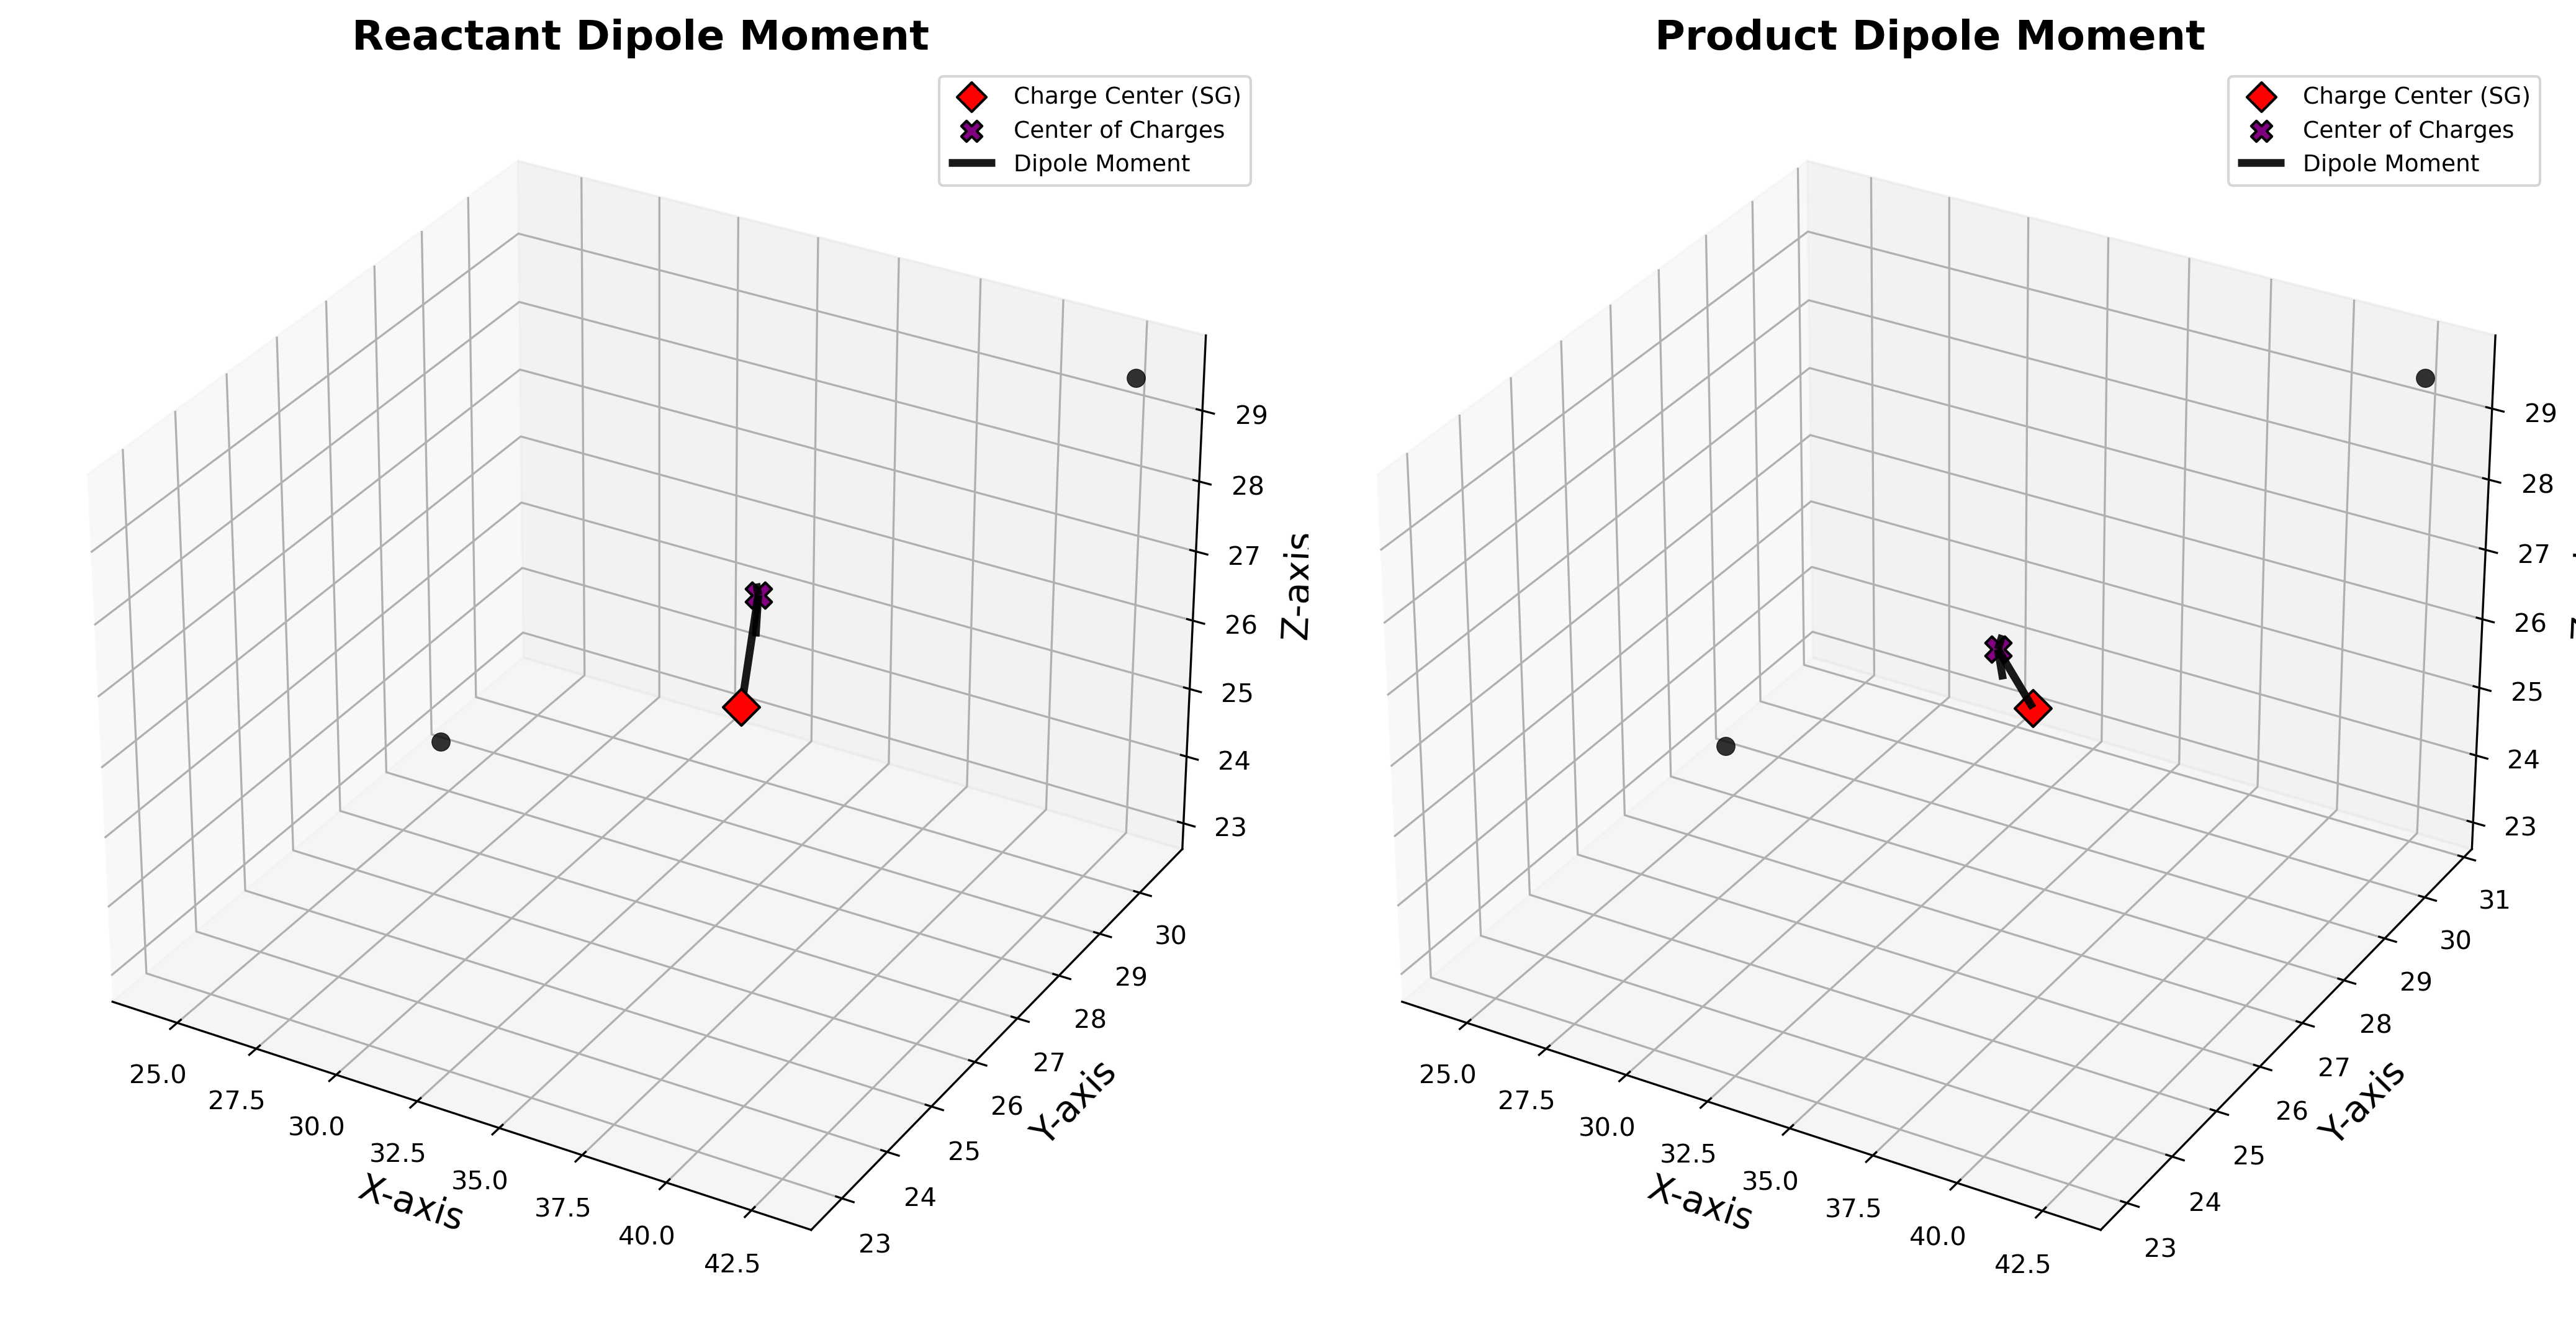

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

# File paths for Reactant and Product states
reactant_file = '/home/hp/results/MOUSE/level1/F139L/replica000/reactant_atom_positions_with_charges.csv'
product_file = '/home/hp/results/MOUSE/level1/F139L/replica000/product_atom_positions_with_charges.csv'

# Load the data
reactant_data = pd.read_csv(reactant_file)
product_data = pd.read_csv(product_file)

# Atom color mapping based on element type (for better visualization)
atom_colors = {
    "SG": "red", "O": "blue", "N": "cyan", "C": "gray", "H": "white"
}

def get_atom_color(atom_label):
    """Assign colors based on atom type in the label."""
    if "SG" in atom_label:
        return "red"
    elif "O" in atom_label:
        return "blue"
    elif "N" in atom_label:
        return "cyan"
    elif "C" in atom_label:
        return "gray"
    elif "H" in atom_label:
        return "white"
    return "black"  # Default color

def plot_dipole(data, title, ax):
    # Extract mean positions of all atoms
    atom_positions = data.filter(regex='Atom_\\d+_[xyz]').mean()
    atom_labels = [col[:-2] for col in atom_positions.index if col.endswith('_x')]
    
    # Extract individual atom positions
    atom_coords = {label: np.array([data[label + '_x'].mean(), 
                                    data[label + '_y'].mean(), 
                                    data[label + '_z'].mean()]) 
                   for label in atom_labels}
    
    # Define charge center as SG (Atom_49)
    charge_center = atom_coords['Atom_49']
    
    # Extract center of charge
    center_of_charges = np.array([data['Center_of_charges_x'].mean(),
                                  data['Center_of_charges_y'].mean(),
                                  data['Center_of_charges_z'].mean()])
    
    # Calculate the dipole moment vector (from SG to charge center)
    dipole_vector = center_of_charges - charge_center

    # Plot all atoms with smaller markers for better dipole visibility
    for label, coord in atom_coords.items():
        ax.scatter(*coord, s=50, alpha=0.8, 
                   color=get_atom_color(label), edgecolors='black', linewidth=0.3)

    # Reduce size of charge center and center of charges
    ax.scatter(*charge_center, color='red', s=100, marker='D', edgecolors='black', label='Charge Center (SG)')
    ax.scatter(*center_of_charges, color='purple', s=100, marker='X', edgecolors='black', label='Center of Charges')

    # Draw dipole moment vector (strong emphasis)
    ax.quiver(*charge_center, *dipole_vector, color='black', linewidth=3, alpha=0.9, label='Dipole Moment', arrow_length_ratio=0.15)
    
    # Labels and title
    ax.set_xlabel('X-axis', fontsize=14)
    ax.set_ylabel('Y-axis', fontsize=14)
    ax.set_zlabel('Z-axis', fontsize=14)
    ax.set_title(title, fontsize=16, fontweight='bold')

    # Adjust legend size
    ax.legend(loc='best', fontsize=9, markerscale=0.8)

# Create subplots for Reactant and Product
fig = plt.figure(figsize=(14, 7), dpi=300)  
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

plot_dipole(reactant_data, 'Reactant Dipole Moment', ax1)
plot_dipole(product_data, 'Product Dipole Moment', ax2)

# Tight layout and show
plt.tight_layout()
plt.show()
